In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')
mpl.rcParams["axes.unicode_minus"] = False

# feature 설명
id : 날짜와 시간별 id

datetime : 날짜와 시간(날짜_시간)

temperature : 기온

precipitation : 강수량

windspeed : 풍속(평균)

humidity : 습도

visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)

ozone : 오존

pm10 : 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)

pm2.5 : 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)

count : 해당 날짜, 시간에 따릉이 대여 수



In [3]:
train = pd.read_csv("./Seoul_Bicycle/train.csv")
print(train.shape)
train.head()

(1459, 11)


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [4]:
test = pd.read_csv("./Seoul_Bicycle/test.csv")
print(test.shape)
test.head()

(715, 10)


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
id                        1459 non-null int64
hour                      1459 non-null int64
hour_bef_temperature      1457 non-null float64
hour_bef_precipitation    1457 non-null float64
hour_bef_windspeed        1450 non-null float64
hour_bef_humidity         1457 non-null float64
hour_bef_visibility       1457 non-null float64
hour_bef_ozone            1383 non-null float64
hour_bef_pm10             1369 non-null float64
hour_bef_pm2.5            1342 non-null float64
count                     1459 non-null float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
id                        715 non-null int64
hour                      715 non-null int64
hour_bef_temperature      714 non-null float64
hour_bef_precipitation    714 non-null float64
hour_bef_windspeed        714 non-null float64
hour_bef_humidity         714 non-null float64
hour_bef_visibility       714 non-null float64
hour_bef_ozone            680 non-null float64
hour_bef_pm10             678 non-null float64
hour_bef_pm2.5            679 non-null float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [7]:
# 데이터 결측치 파악
train.isna().sum() / train.isna().count()

id                        0.000000
hour                      0.000000
hour_bef_temperature      0.001371
hour_bef_precipitation    0.001371
hour_bef_windspeed        0.006169
hour_bef_humidity         0.001371
hour_bef_visibility       0.001371
hour_bef_ozone            0.052090
hour_bef_pm10             0.061686
hour_bef_pm2.5            0.080192
count                     0.000000
dtype: float64

In [8]:
test.isna().sum() / test.isna().count()

id                        0.000000
hour                      0.000000
hour_bef_temperature      0.001399
hour_bef_precipitation    0.001399
hour_bef_windspeed        0.001399
hour_bef_humidity         0.001399
hour_bef_visibility       0.001399
hour_bef_ozone            0.048951
hour_bef_pm10             0.051748
hour_bef_pm2.5            0.050350
dtype: float64

In [9]:
null_columns = ["hour_bef_temperature", "hour_bef_windspeed", "hour_bef_humidity", "hour_bef_ozone", "hour_bef_pm10", "hour_bef_pm2.5"]
for column in null_columns:
    train[column].fillna(train[column].mean(), inplace = True)
    test[column].fillna(test[column].mean(), inplace = True)

In [10]:
train["hour_bef_precipitation"].fillna(0, inplace = True)
test["hour_bef_precipitation"].fillna(0, inplace = True)
train["hour_bef_visibility"].fillna(train["hour_bef_visibility"].mode()[0], inplace = True)
test["hour_bef_visibility"].fillna(test["hour_bef_visibility"].mode()[0], inplace = True)

In [11]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [12]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

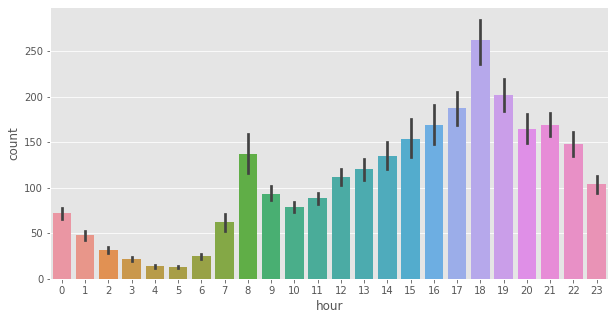

In [13]:
# 시간과 count의 관계
plt.figure(figsize = (10, 5))
sns.barplot(x = "hour", y = "count", data = train)
plt.show()

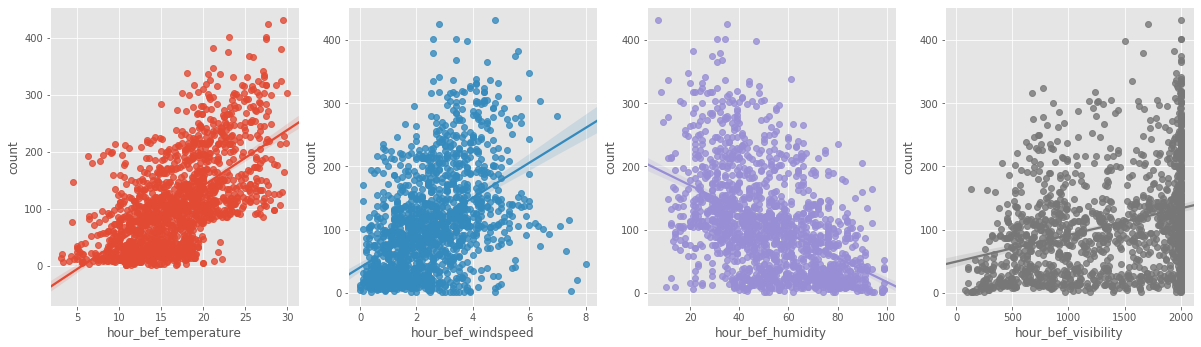

In [14]:
columns = ["hour_bef_temperature", "hour_bef_windspeed", "hour_bef_humidity", "hour_bef_visibility"]
fig, axes = plt.subplots(ncols = 4)
fig.set_size_inches(20.5, 5.5)
for i, column in enumerate(columns):
    sns.regplot(x = column, y = "count", data = train, ax = axes[i])

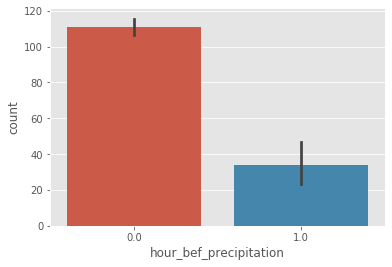

In [15]:
sns.barplot(x = "hour_bef_precipitation", y = "count", data = train)
plt.show()

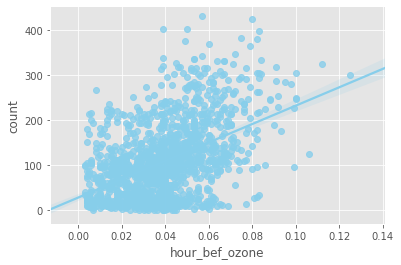

In [16]:
sns.regplot(x = "hour_bef_ozone", y = "count", data = train, color = "skyblue")
plt.show()

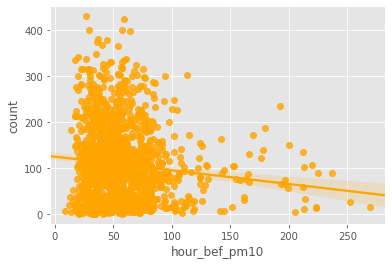

In [17]:
sns.regplot(x = "hour_bef_pm10", y = "count", data = train, color = "orange")
plt.show()

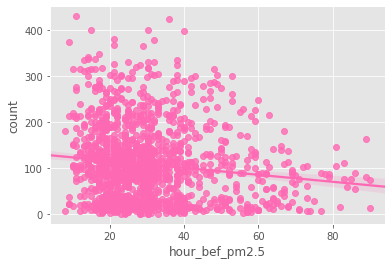

In [18]:
sns.regplot(x = "hour_bef_pm2.5", y = "count", data = train, color = "hotpink")
plt.show()

In [20]:
X_train = train.drop(["id", "count"], axis = 1)
X_test = test.drop("id", axis = 1)
y_train = train["count"]

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [22]:
rfModel = RandomForestRegressor()
rfModel.fit(X_train, y_train)
preds = rfModel.predict(X_train)
score = np.sqrt(mean_squared_error(y_train, preds))
print("Ramdom Forest Score : {0:.6f}".format(score))

Ramdom Forest Score : 17.359006


In [23]:
gbModel = GradientBoostingRegressor()
gbModel.fit(X_train, y_train)
preds = gbModel.predict(X_train)
score = np.sqrt(mean_squared_error(y_train, preds))
print("Gradient Boosting Score : {0:.6f}".format(score))

Gradient Boosting Score : 32.632268


In [71]:
xgbModel = XGBRegressor(max_depth = 3, learning_rate=0.01)
xgbModel.fit(X_train, y_train)
preds = xgbModel.predict(X_train)
score = np.sqrt(mean_squared_error(y_train, preds))
print("XGBoosting Score : {0:.6f}".format(score))

[17:31:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoosting Score : 65.325406


In [77]:
lgbModel = LGBMRegressor()
lgbModel.fit(X_train, y_train)
preds = lgbModel.predict(X_train)
score = np.sqrt(mean_squared_error(y_train, preds))
print("LightGB Score : {0:.6f}".format(score))

LightGB Score : 16.384850


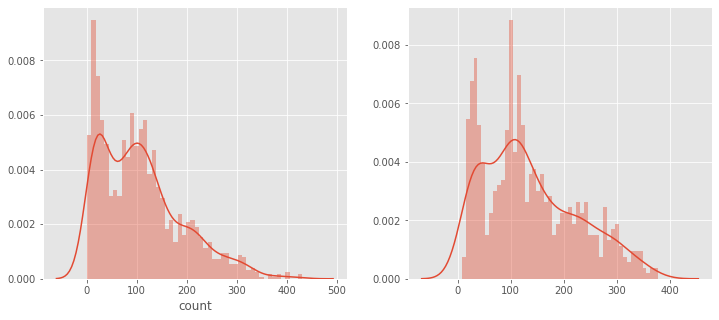

In [79]:
predsTest = lgbModel.predict(X_test)
fig, axes = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)
for i, pred in enumerate([y_train, predsTest]):
    sns.distplot(pred, ax = axes[i], bins = 50)

In [80]:
submission = pd.read_csv("./Seoul_Bicycle/submission.csv")
submission["count"] = predsTest
submission.head()

,id,count
0,0,107.216323
1,1,202.705049
2,2,45.933111
3,4,37.676422
4,5,40.030120


In [81]:
submission.to_csv("Seoul Bicycle.csv", index = False)